In [44]:
from matplotlib import pyplot as plt
from utils.utils import *
import utils.promethee_functions as pf
import utils.clustering_functions as cf

data = read_data()
group0 = ["PAK", "SDN", "BDI", "HTI"]
group1 = ["EST", "CZE", "MLT", "SGP", "IRL"]
group2 = ["CHE", "ISL", "NZL", "SWE"]

all_groups = group0 + group1 + group2

data = data.loc[all_groups]

get_min_max_criteria(data, False)
# Nb of criteria
K = data.columns.shape[0] # Nb of criteria
L = data.iloc[0]["co2prod"].shape[0] # Length of the time series

# W = [1/K for i in range(K)] # Weights of the criteria (equal weights)
W = [1,1,0,0,0,0] #co2prod, hdi,le, gdi, eys, mys

W = [w/sum(W) for w in W]
#co2prod, hdi,le, gdi, eys, mys
P = [10, 0.4, 20, 0.3, 5, 5]  # Preference thresholds
Q = [1, 0.03, 2, 0.01, 0.5, 0.5] # Indifference thresholds
# Q = [10, 0.3, 40,  0.4, 4, 2] # Indifference thresholds
# P = [28, 0.9, 80, 1, 18, 12] # Preference thresholds

Weight_vector = [1/L for _ in range(L)] # Equal weights times

Reading HDI dataset
co2prod: min=0.0, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=85.473
gdi: min=0.383, max=1.041
eys: min=3.5751, max=23.2477
mys: min=1.4606, max=14.2559
co2prod: min=9.9, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=84.255
gdi: min=0.383, max=1.041
eys: min=3.5751, max=19.7613
mys: min=1.4606, max=13.9041


In [45]:
data

,co2prod,hdi,le,gdi,eys,mys
iso3,,,,,,
PAK,"[32.817923848999996, 32.839545195, 32.81713493...","[0.394, 0.399, 0.403, 0.405, 0.409, 0.411, 0.4...","[60.066, 60.259, 60.116, 59.934, 60.116, 59.87...","[0.539, 0.57, 0.576, 0.585, 0.598, 0.589, 0.60...","[4.238239765, 4.280649002, 4.323058238, 4.3654...","[2.291861259, 2.390371085, 2.488880911, 2.5873..."
SDN,"[33.179499414999995, 33.197418881, 33.22244834...","[0.322, 0.328, 0.318, 0.328, 0.371, 0.361, 0.3...","[49.732, 50.213, 45.891, 46.575, 56.644, 51.99...","[0.755, 0.76, 0.795, 0.805, 0.762, 0.794, 0.80...","[3.575123192, 3.716464477, 3.863393641, 4.0161...","[1.5, 1.594, 1.688, 1.782, 1.876, 1.97, 2.064,..."
BDI,"[33.367526346999995, 33.363043413999996, 33.36...","[0.285, 0.287, 0.284, 0.257, 0.288, 0.284, 0.2...","[44.86, 44.227, 43.895, 37.105, 44.08, 44.059,...","[0.822, 0.824, 0.814, 0.832, 0.823, 0.829, 0.8...","[4.218900204, 4.333489895, 4.203050137, 4.4798...","[1.460590005, 1.514265001, 1.567939997, 1.6216..."
HTI,"[33.261935857, 33.267466324, 33.282304732, 33....","[0.441, 0.445, 0.447, 0.449, 0.447, 0.457, 0.4...","[52.975, 53.391, 53.842, 54.35, 54.653, 55.547...","[0.839, 0.844, 0.845, 0.846, 0.845, 0.854, 0.8...","[8.003592771, 8.101668637, 8.200946323, 8.3014...","[2.680190065, 2.78181809, 2.883446115, 2.98507..."
EST,"[9.900033439999998, 11.595052339999995, 17.551...","[0.741, 0.736, 0.726, 0.718, 0.72, 0.733, 0.74...","[69.831, 69.712, 69.344, 68.579, 67.885, 68.72...","[1.006, 1.006, 1.009, 1.012, 1.025, 1.025, 1.0...","[13.0799799, 12.78081989, 12.62077999, 12.3279...","[9.655532811, 9.900291752, 10.14505069, 10.389..."
CZE,"[17.460815789999998, 18.955638559999997, 19.27...","[0.748, 0.746, 0.747, 0.755, 0.766, 0.775, 0.7...","[71.409, 71.97, 72.33, 72.853, 73.082, 73.177,...","[0.939, 0.944, 0.958, 0.948, 0.947, 0.95, 0.95...","[12.10068035, 12.02169037, 11.74785995, 11.962...","[9.10276631, 9.287969589, 9.476940982, 9.66591..."
MLT,"[26.762335037999996, 27.243460866999996, 27.23...","[0.726, 0.73, 0.734, 0.745, 0.748, 0.755, 0.75...","[75.985, 75.458, 75.382, 76.696, 76.621, 77.09...","[0.876, 0.879, 0.88, 0.889, 0.876, 0.886, 0.90...","[12.54930019, 12.75677013, 12.94281006, 13.153...","[6.4654826, 6.574985169, 6.684487739, 6.793990..."
SGP,"[19.00038651, 19.230383299999996, 18.709791819...","[0.78, 0.788, 0.796, 0.805, 0.814, 0.821, 0.82...","[74.944, 75.329, 75.601, 75.802, 75.885, 75.97...","[0.953, 0.959, 0.957, 0.954, 0.952, 0.949, 0.9...","[14.87521681, 14.93952918, 15.00411961, 15.068...","[6.363349915, 6.661061954, 6.958773994, 7.2564..."
IRL,"[23.953426254999997, 23.797573191999994, 23.91...","[0.743, 0.749, 0.757, 0.767, 0.779, 0.786, 0.7...","[74.842, 75.031, 75.428, 75.294, 75.801, 75.47...","[0.952, 0.955, 0.959, 0.96, 0.962, 0.965, 0.97...","[12.67891026, 12.74100018, 12.93768978, 13.409...","[6.995905683, 7.243639946, 7.500146806, 7.7566..."


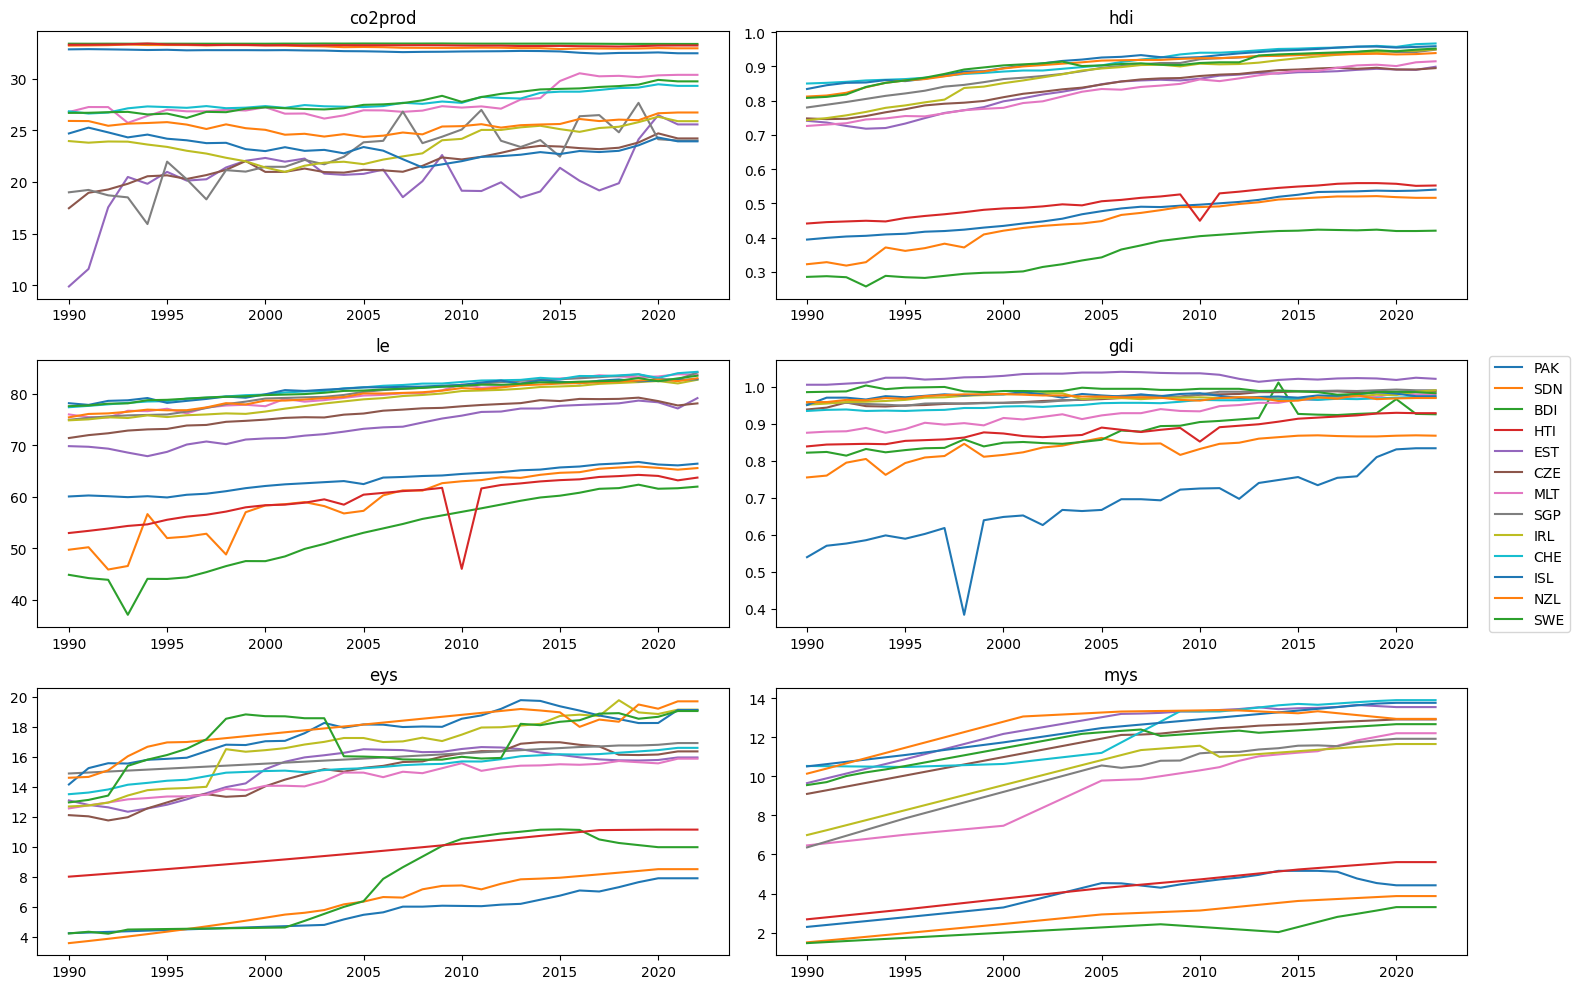

In [46]:
plot_data(data, legend=True)

In [47]:
phi_c_all = pf.get_all_Phi_c(data, P , Q, L)

c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]


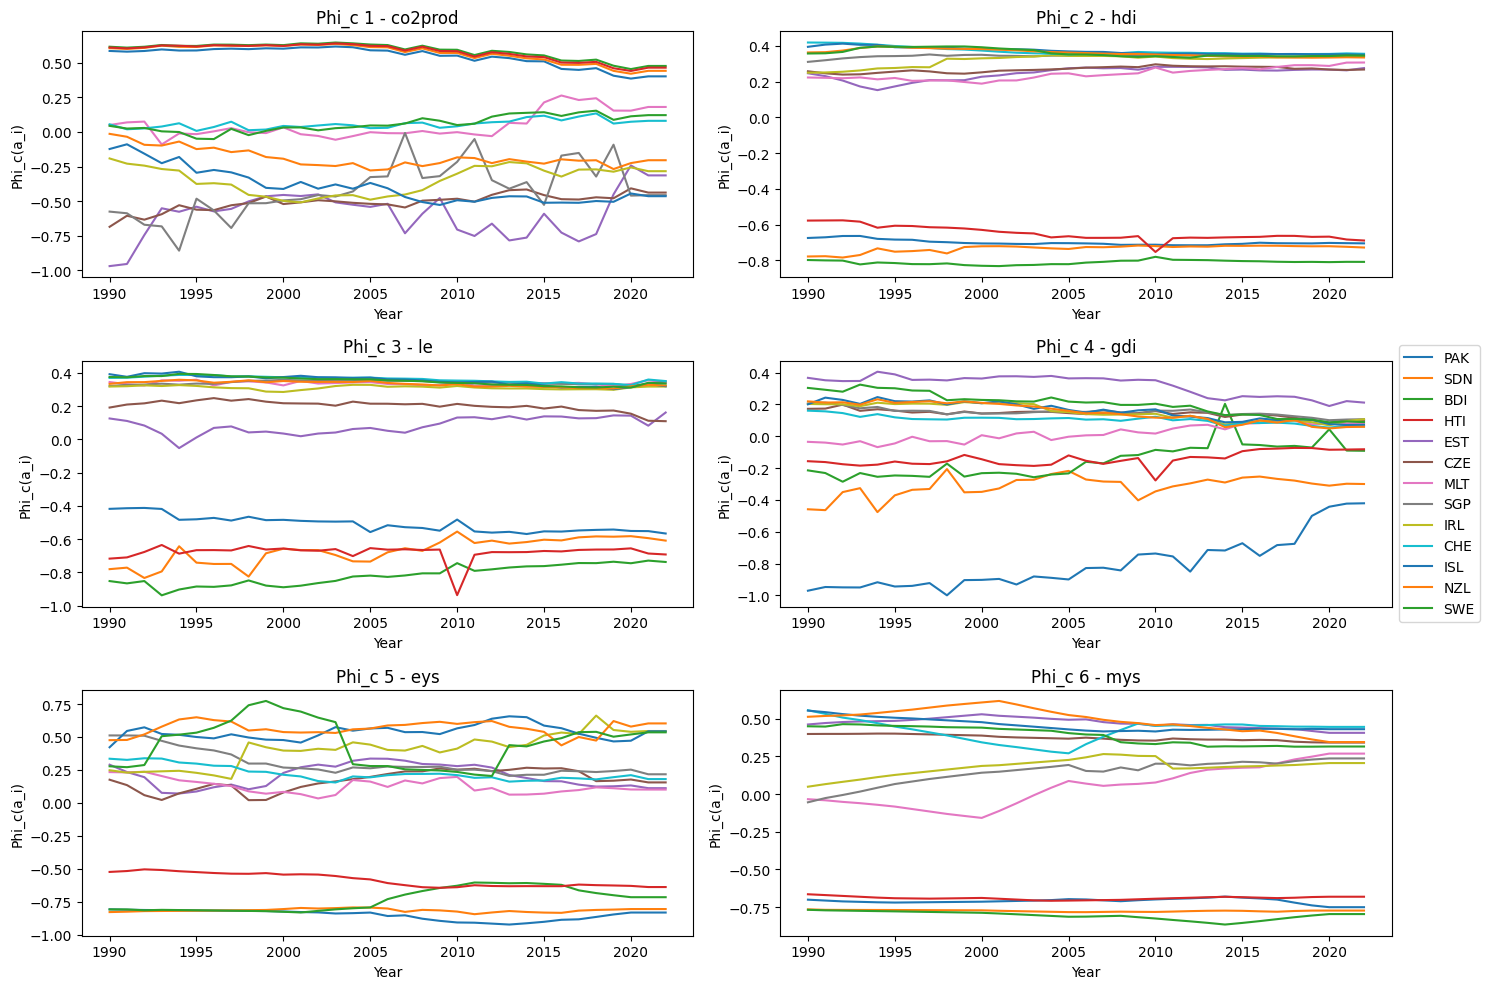

In [48]:
plot_phi_c_all(phi_c_all, data.columns, data.index, labels=True)

In [50]:
W = [1/K for i in range(K)] # Weights of the criteria (equal weights)
N = data.shape[0] # Nb of alternatives

PHI = pf.PHI_all(phi_c_all, W, N, L, K)
# Transform PHI into a dataframe with ISO3 as index and years as columns
PHI_df = pd.DataFrame(PHI, index=data.index, columns=np.arange(1990, 2023))

In [52]:
def plot_PHI(PHI, labels=True):
    """
    Plot the net flow series for all alternatives
    :param PHI: dataframe with alternatives as index and years as columns
    """
    if labels:
        score = {}
        for i in range(PHI.shape[0]):
            score[PHI.index[i]] = sum(PHI.iloc[i])
        score = dict(sorted(score.items(), key=lambda item: item[1], reverse=True))

        # Sort the alternatives by score
        PHI = PHI.loc[list(score.keys())]

    alt_names = PHI.index

    fig, ax = plt.subplots()
    # size
    fig.set_size_inches(10, 5)
    for i in range(PHI.shape[0]):
        ax.plot(PHI.iloc[i], label=alt_names[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Net flow")
    ax.set_title("PHI scores for all alternatives")
    if labels:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()


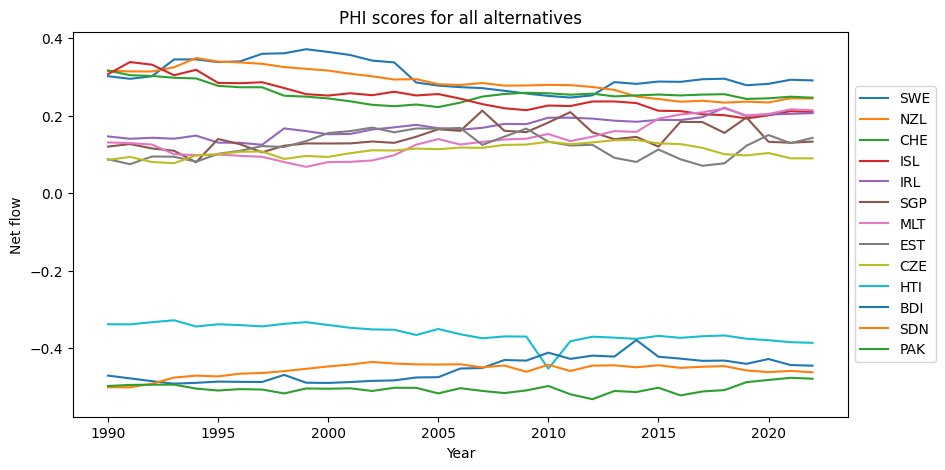

In [53]:
plot_PHI(PHI_df, True)

[0.5, 0.0, 0.0, 0.5, 0.0, 0.0]


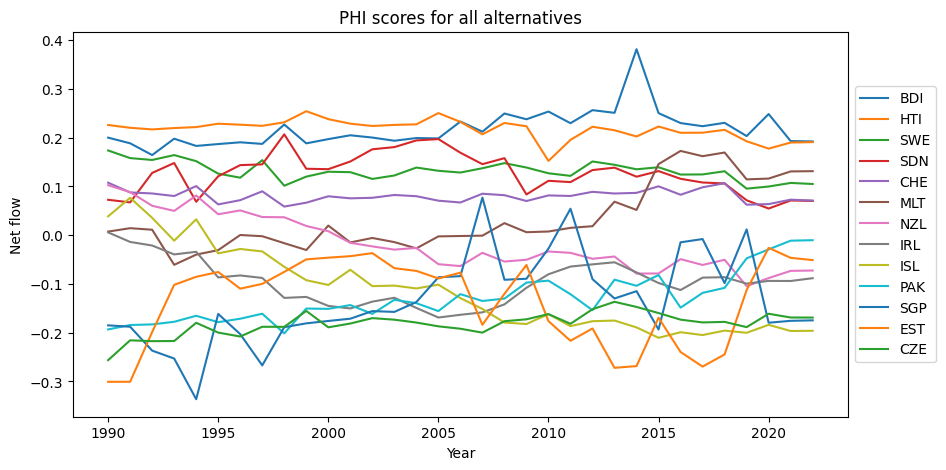

In [54]:
W = [1, 0, 0, 1, 0, 0]
# W = [0.3, 0.1, 0.3, 0.1, 0.1, 0.1]
W = [w/sum(W) for w in W]
print(W)
PHI = pf.PHI_all(phi_c_all, W, N, L, K)
# Transform PHI into a dataframe with ISO3 as index and years as columns
PHI_df = pd.DataFrame(PHI, index=data.index, columns=np.arange(1990, 2023))
plot_PHI(PHI_df, True)

# Gamma fix?

In [60]:
def gamma_ai_aj(ai, aj, i, j, PHI_c_all, W, L, criterias):
    """ 
    Compute the gamma value between two alternatives
    - ai: a multi-criteria time series
    - aj: a multi-criteria time series
    - i: the index of ai in the data
    - j: the index of aj in the data
    - PHI_c_all: A list of k lists of N time series
    - W: The weights of the criteria
    - L: The length of the time series
    - criterias: the names of the criteria

    Returns:
     - gamma(ai, aj): a time series of size L where each cell is the sum of the weighted differences between PHI_c(ai) and PHI_c(aj) for the times where ai is preferred to aj

    gamma(ai, aj) = sum_c (W_c * (PHI_c(ai) - PHI_c(aj))) but only for the times where ai is preferred to aj
    """
    # Initialize gamma list of L zeros
    gamma = [0 for _ in range(L)]
    for t in range(L): # For each time step
        # Check if the value of ai is preferred to aj
        c_nb=0
        for c in criterias:
            if ai[c][t] > aj[c][t]: # If ai has a higher value than aj (the value is the score)
                gamma[t] += W[c_nb]* (PHI_c_all[c_nb][i][t] - PHI_c_all[c_nb][j][t])
            c_nb += 1

    return gamma

def get_gamma_matrix(data, PHI_c_all, W):
    """
    Returns: The gamma matrix, size NxN where each cell is a time series
    - data: the multi-criteria time series data
    - PHI_c_all: A list of k lists of N time series
    - W: The weights of the criteria
    """
    criterias = data.columns[:]

    L = data.iloc[0][criterias[1]].shape[0] # Length of the time series
    N = data.shape[0] # Number of time series/alternatives

    gamma_matrix = np.zeros((N, N, L))
    for i in range(N):
        for j in range(N):
            if i != j:
                gamma_matrix[i][j] = gamma_ai_aj(data.iloc[i], data.iloc[j], i, j, PHI_c_all, W, L, criterias)
    return gamma_matrix

In [61]:
W = W = [1/K for i in range(K)] # Weights of the criteria (equal weights)
gamma = get_gamma_matrix(data, phi_c_all, W)

In [62]:
gamma.min()

np.float64(0.0)

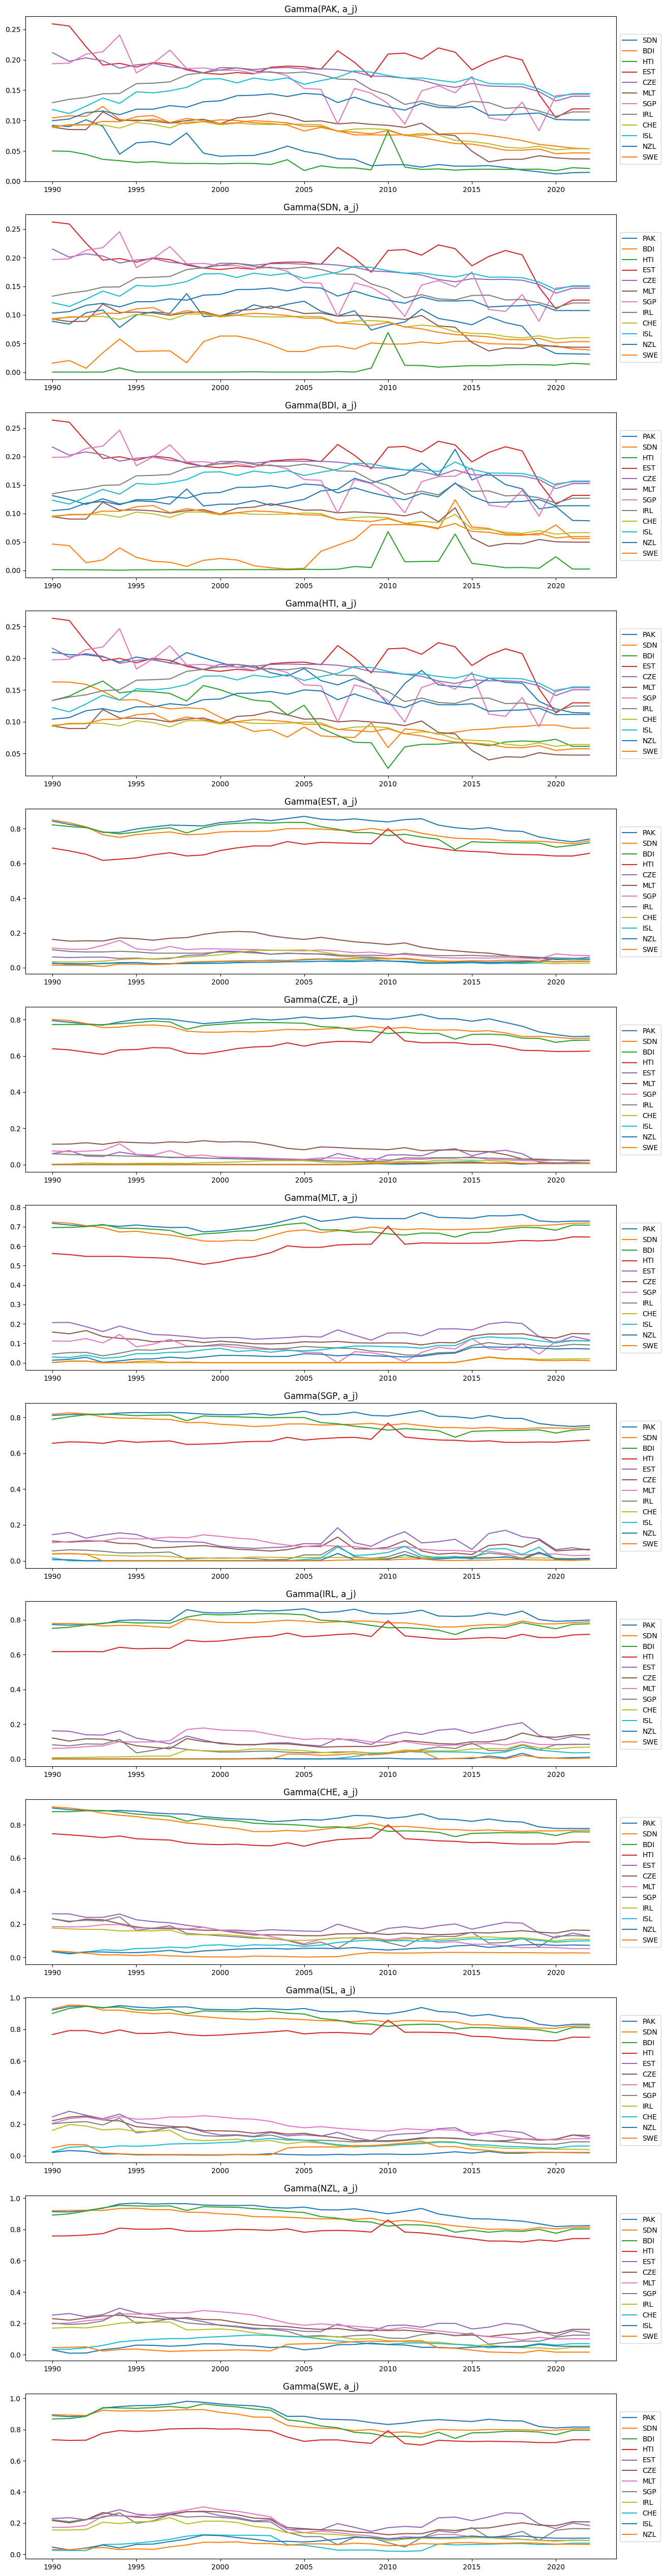

In [63]:
def plot_gammas(gamma_matrix, alt_names):
    """
    Plot the gamma matrix for each pair of alternatives
    """
    N = gamma_matrix.shape[0]
    x = np.arange(1990, 2023)
    fig, axes = plt.subplots(N, 1, figsize=(15, 5*N))
    for i in range(N):
        for j in range(N):
            if i != j:
                axes[i].plot(x, gamma_matrix[i][j], label=f"{alt_names[j]}")
                axes[i].set_title(f"Gamma({alt_names[i]}, a_j)")
                axes[i].grid()
                axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
                
    # plt.tight_layout()
    plt.show()

plot_gammas(gamma, data.index)